### **Import library and dataset**

In [15]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-rating-by-esrb/test_esrb.csv
/kaggle/input/video-games-rating-by-esrb/Video_games_esrb_rating.csv


In [16]:
#Loading our train dataset
df = pd.read_csv("/kaggle/input/video-games-rating-by-esrb/Video_games_esrb_rating.csv")
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [17]:
#Loading our result dataset
df_result = pd.read_csv("/kaggle/input/video-games-rating-by-esrb/test_esrb.csv")
df_result.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


### **Data Visualization**

**We'll only see the data that train our model.**

In [18]:
# Checking the shape of our train dataset
df.shape

(1895, 34)

In [19]:
# Checking if there's any null data
df.isna().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

<AxesSubplot:>

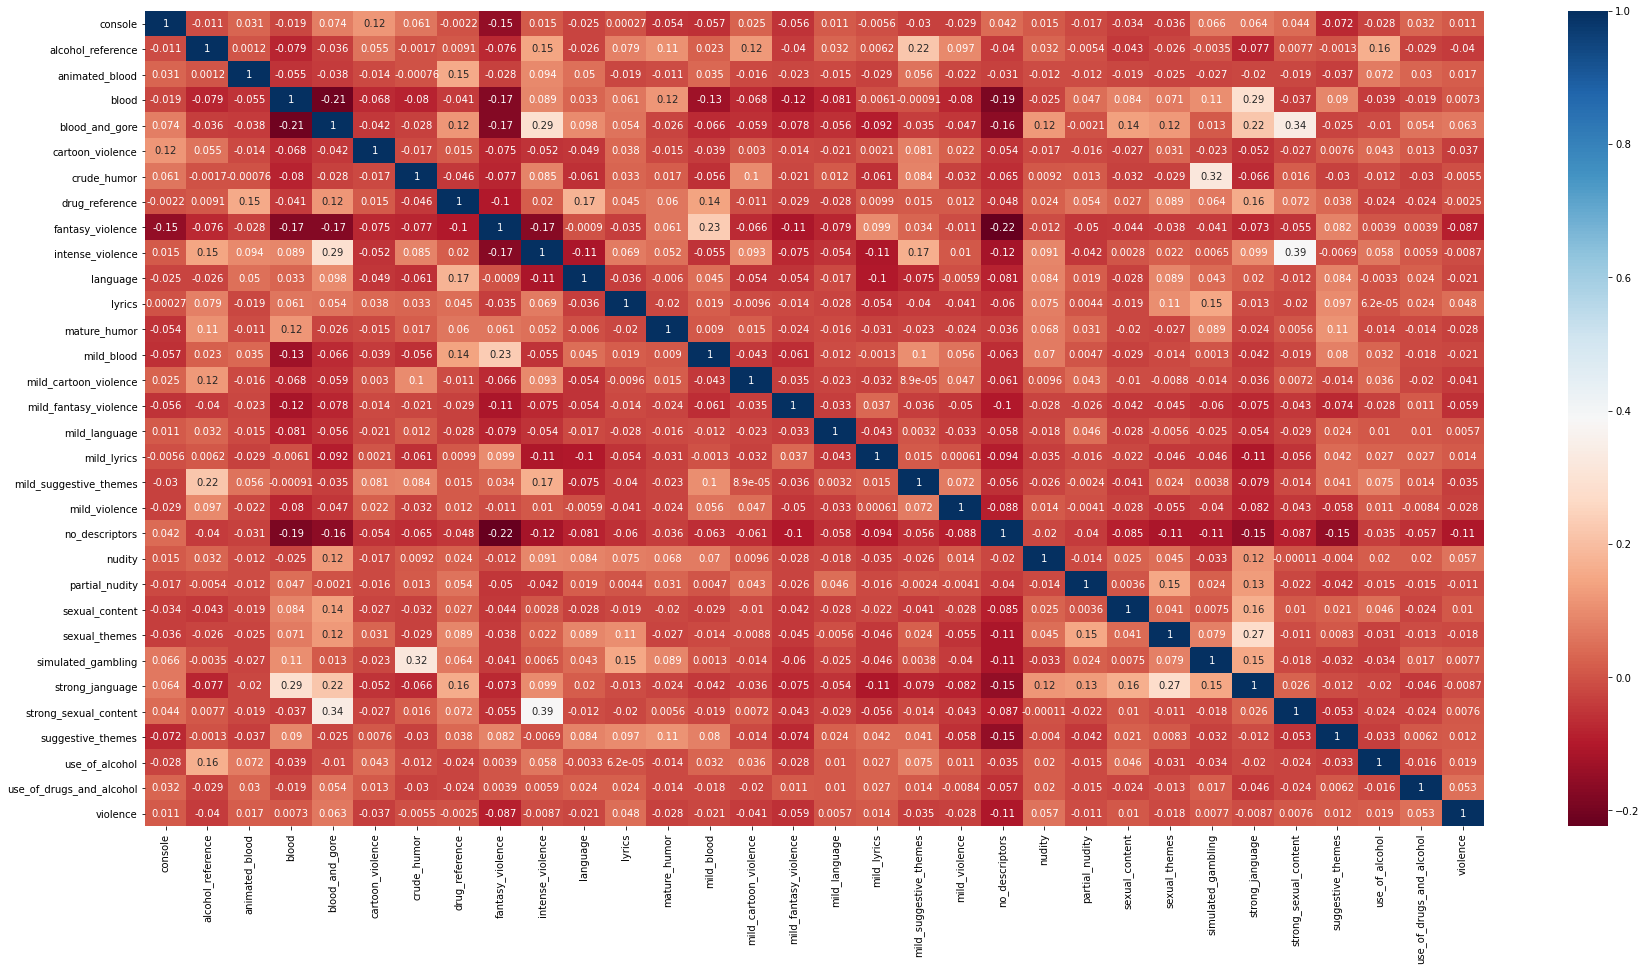

In [20]:
# Checking correlation between int attributes
plt.figure(figsize=(30, 15))

sns.heatmap(df.corr(), annot=True, cmap="RdBu")

In [21]:
# Checking columns names
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [22]:
# Checking attributes types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

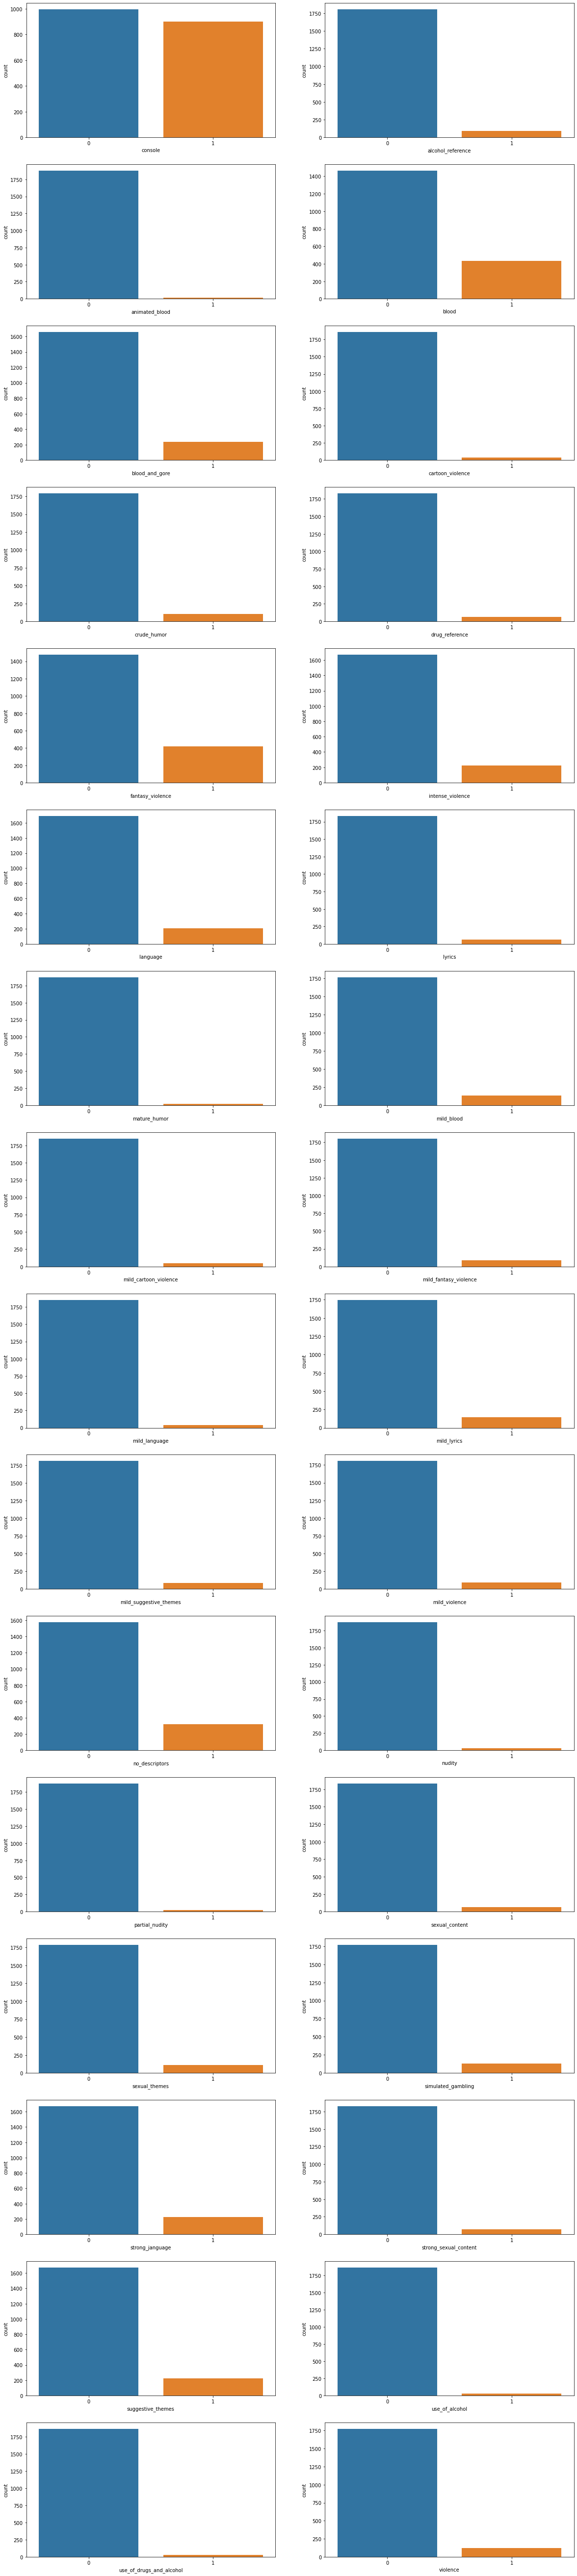

In [54]:
# Creating a variable with only int attributes
feature = [feature for feature in df.columns if df[feature].dtype != 'O']
feature

# Creating a list of enumerated attributes
list(enumerate(feature))

# Plotting the counts of each attributes in the enumerated list
plt.figure(figsize=(20, 120))
for n in enumerate(feature):
    plt.subplot(20,2,n[0]+1)
    sns.countplot(n[1],data=df)
plt.show()

### **Creating our model**

In [24]:
# Creating our predictors and class for training
x_train = df.drop(["title", "esrb_rating"], axis = 1)
y_train = df["esrb_rating"]

# Creating our predictors and class for test 
x_test = df_result.drop(["title", "esrb_rating"], axis = 1)
y_test = df_result["esrb_rating"]

In [25]:
# Creating our model
et_classifier = ExtraTreesClassifier()
et_classifier.fit(x_train, y_train)
predictions_train = et_classifier.predict(x_train)
predictions_test = et_classifier.predict(x_test)

accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)

In [26]:
# Model's accuracy for training
accuracy_train

0.9245382585751979

In [27]:
# Model's accuracy for test
accuracy_test

0.848

### **Tuning our hyperparameters with Grid Search**

In [28]:
# Creating arrays to n_estimators and max_features range of parameters
n_estimators = np.arange(25, 201, 25)
max_features = np.arange(1, 6, 1)

# Creating a dictionary with our arrays parameters
param_grid = dict(n_estimators=n_estimators, 
                  max_features=max_features)

# Tuning our hyperparameters with Grid Search
grid = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200])})

In [29]:
# Getting the best parameters for our model and a score for them
grid.best_params_, grid.best_score_

({'max_features': 1, 'n_estimators': 200}, 0.8591029023746701)

In [30]:
# Recreating the model with our ideal parameters
et_classifier = ExtraTreesClassifier(n_estimators=50, max_features=1, random_state=0)
et_classifier.fit(x_train, y_train)
predictions_train = et_classifier.predict(x_train)
predictions_test = et_classifier.predict(x_test)

accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)

In [31]:
# Accuracy of training for our tuned model
accuracy_train

0.9245382585751979

In [32]:
# Accuracy of test for our tuned model
accuracy_test

0.85

<AxesSubplot:>

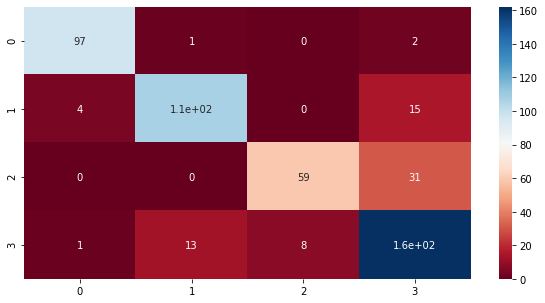

In [33]:
# Plotting the confusion matrix generated by the tuned model
confusion_matrix = confusion_matrix(y_test, predictions_test)

plt.figure(figsize=(10, 5))

sns.heatmap(confusion_matrix, annot=True, cmap="RdBu")

In [34]:
# Saving our model in a pickle file
joblib.dump(et_classifier, "video_games_category.pkl")

['video_games_category.pkl']